In [8]:
import pandas as pd
import os
import glob
import numpy as np
from IPython.display import display
import time
import csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def load_csvs(dir_car, dir_watch):
    """ load all data from csv files, adapt sampling frequencies to 1 second and merge together
    
    we assume that the directories contain only the desired files.
    we round all time values to full second granularity and then drop duplicates on the time dimension
    we work with relative timestamps, starting at 0 seconds

    Parameters
    ----------
    dir_car : string
        absolute path to the directory with all the car csvs
    dir_watch : string
        absolute path to the directory with all the watch csvs

    Returns
    -------
    pandas DataFrame

    """
    
    os.chdir(dir_car)
    files = [i for i in glob.glob('*_DataGroup_*.csv')]
    
    df_car = pd.DataFrame()
    for f in files:
        print('loading {} ...'.format(f))
        df = pd.read_csv(f)
        df.time = np.floor(df.time)
#         print(len(df.time))
        df = df.drop_duplicates(subset=['time'])
        df = df.set_index('time', drop=True, append=False)
#         print(df.shape)
        try:
            df_car = pd.concat([df_car, df], axis=1, join='outer')
        except KeyError:
            df_car = df
#         print(df_car.shape)
    
    
    
    os.chdir(dir_watch)
    files = [i for i in glob.glob('*.csv')]
    
    samp_freq_dict = {
        'BVP': 64,
        'HR': 1,
        'EDA': 4,
        'TEMP': 4,
        'ACC': 32,
    }
    
#     df.iloc[::5, :]

    
    df_watch = pd.DataFrame()
    for f in files:
        print('loading {} ...'.format(f))
        filename = f.split('.')[-2]
        df = pd.read_csv(f)
        df = df.iloc[::samp_freq_dict[filename], :]
#         print(df.shape)
        df = df.reset_index(drop=True)
        df.index.name = 'time'
        df.columns = ['{}_{}'.format(filename,x) for x in range(df.shape[1])]
#         display(df)
        
        try:
            df_watch = pd.concat([df_watch, df], axis=1, join='outer')
        except KeyError:
            df_watch = df
#         print(df_watch.shape)
#     display(df_watch.head())

    df_watch.index.name = 'time'
#     display(df_watch)
    # merge car and watch data
    df_all = pd.concat([df_watch, df_car], axis=1, join='inner')
    
    return df_all

In [10]:
# absolut base_dir
base_dir = '/Users/benjamin/code/starthack19/'
os.chdir(base_dir)
golden_table = load_csvs(os.path.join(base_dir, 'data/for_demo/car_19-23'), os.path.join(base_dir, 'data/for_demo/watch'))
print('shape of golden table: {}'.format(golden_table.shape))
# display(golden_table.head())

loading 20190309-182258_DataGroup_5.csv ...
loading 20190309-182258_DataGroup_4.csv ...
loading 20190309-182258_DataGroup_6.csv ...
loading 20190309-182258_DataGroup_7.csv ...
loading 20190309-182258_DataGroup_3.csv ...
loading 20190309-182258_DataGroup_2.csv ...
loading 20190309-182258_DataGroup_1.csv ...
loading 20190309-182258_DataGroup_14.csv ...
loading 20190309-182258_DataGroup_15.csv ...
loading 20190309-182258_DataGroup_17.csv ...
loading 20190309-182258_DataGroup_16.csv ...
loading 20190309-182258_DataGroup_12.csv ...
loading 20190309-182258_DataGroup_13.csv ...
loading 20190309-182258_DataGroup_11.csv ...
loading 20190309-182258_DataGroup_10.csv ...
loading 20190309-182258_DataGroup_18.csv ...
loading 20190309-182258_DataGroup_9.csv ...
loading 20190309-182258_DataGroup_8.csv ...
loading TEMP.csv ...
loading HR.csv ...
loading ACC.csv ...
loading EDA.csv ...
loading BVP.csv ...
shape of golden table: (146, 58)


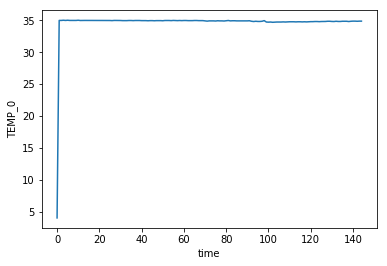

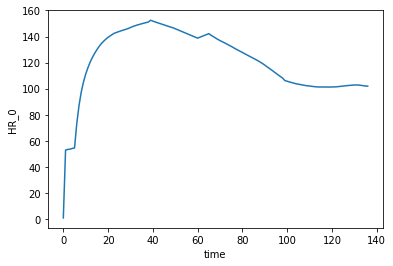

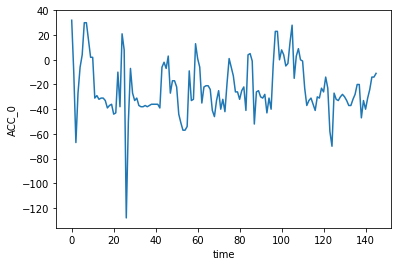

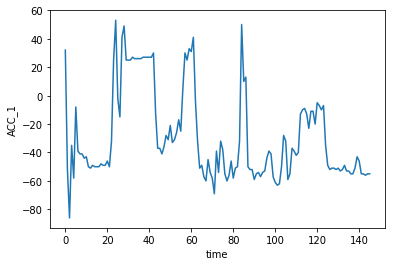

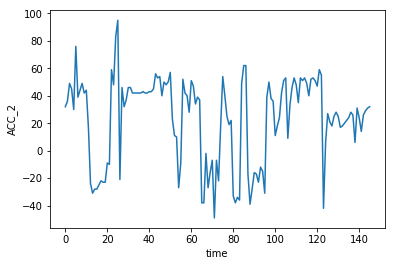

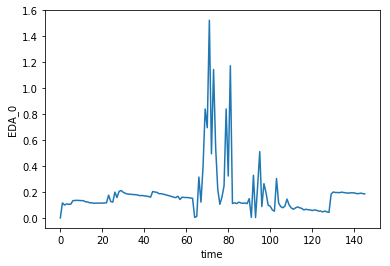

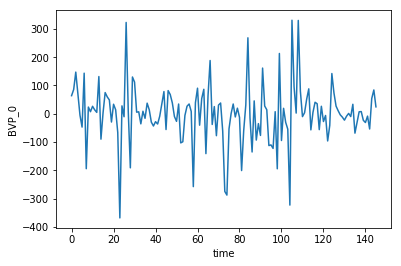

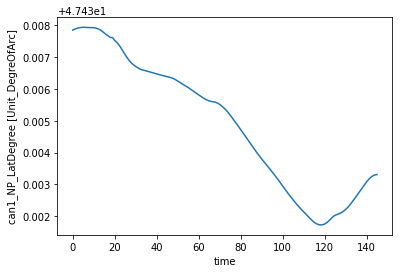

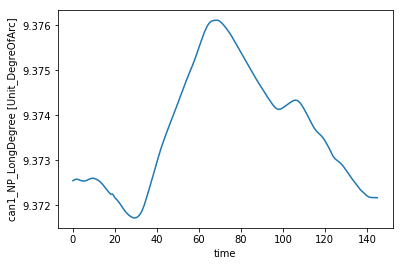

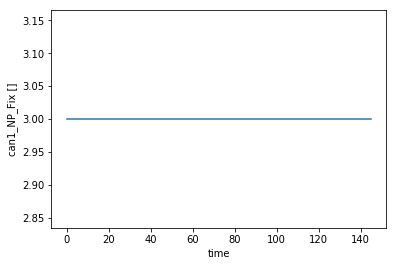

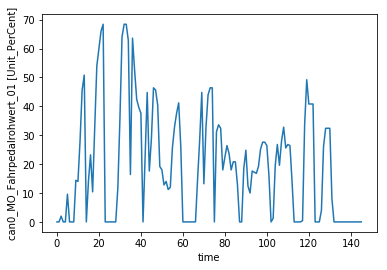

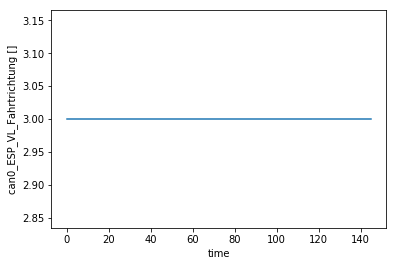

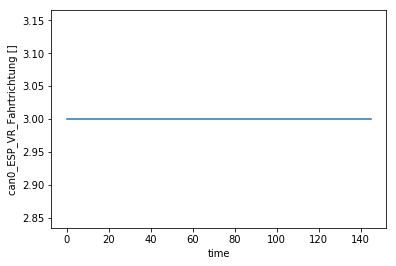

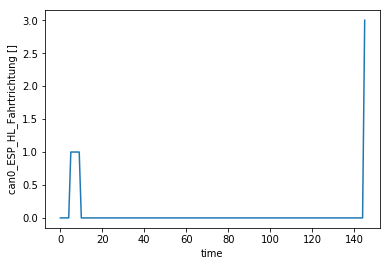

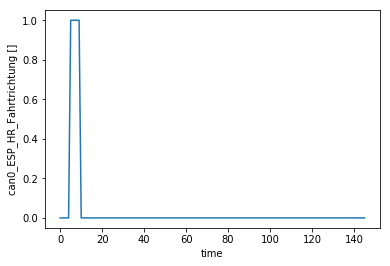

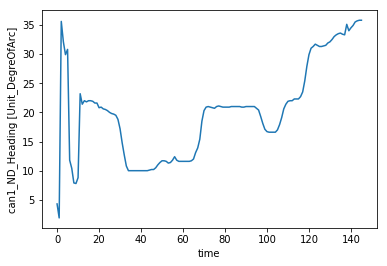

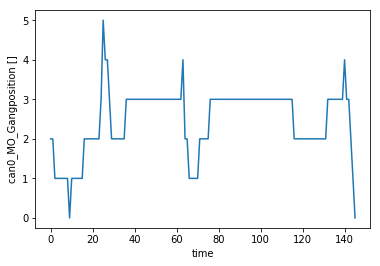

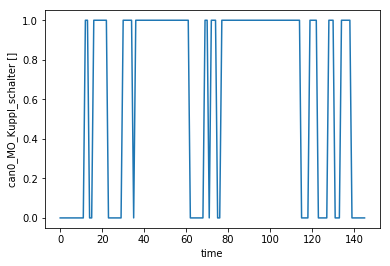

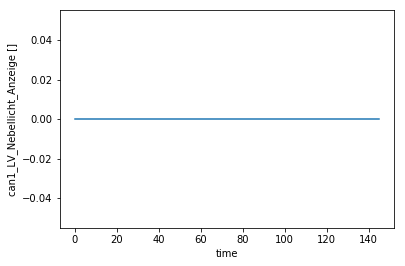

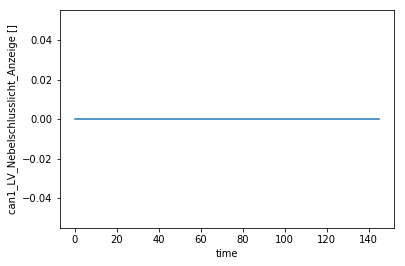

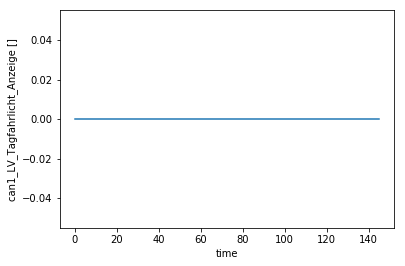

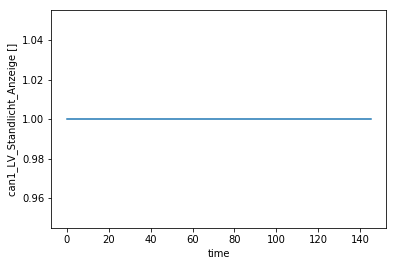

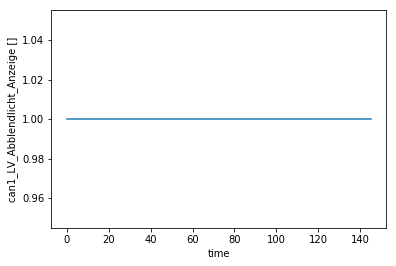

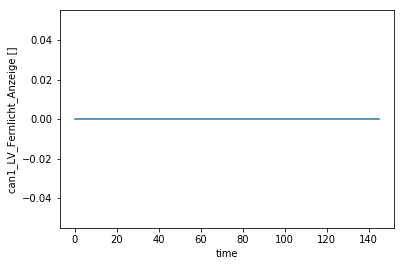

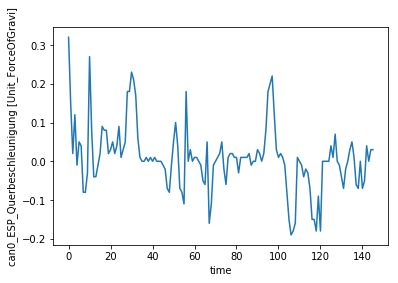

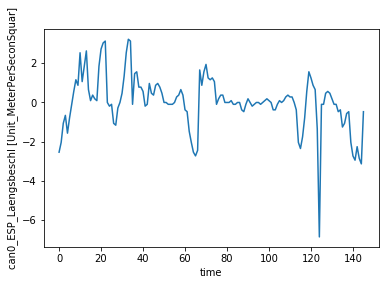

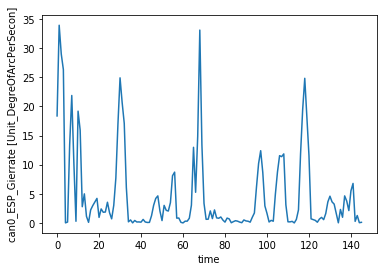

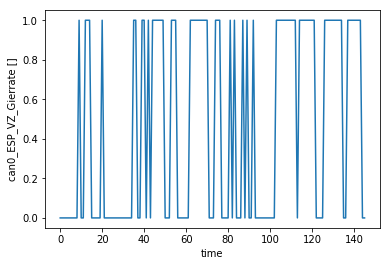

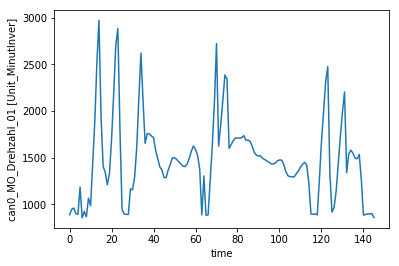

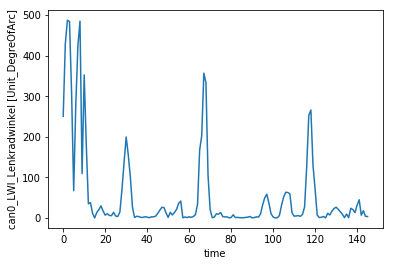

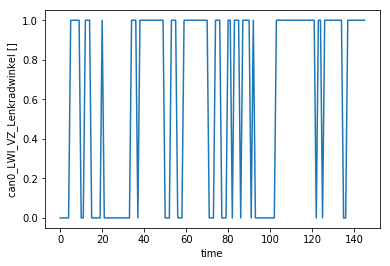

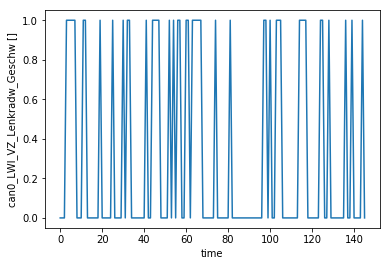

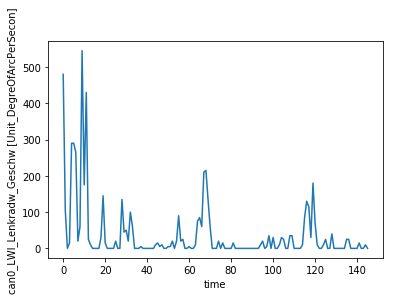

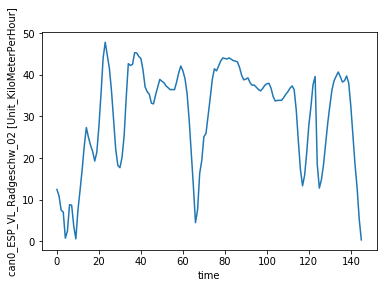

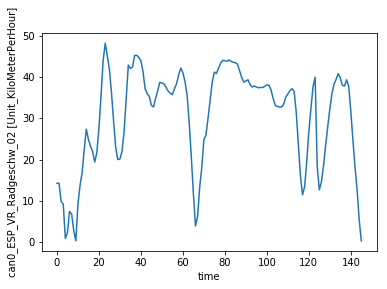

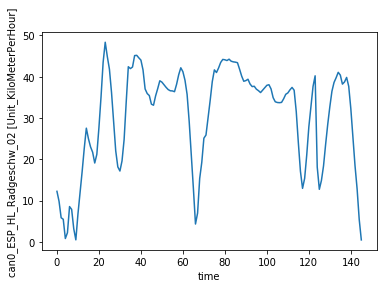

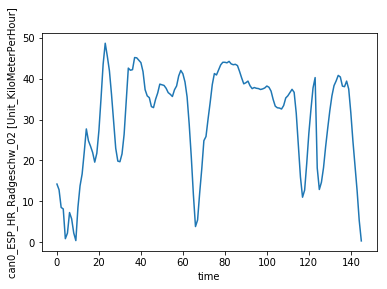

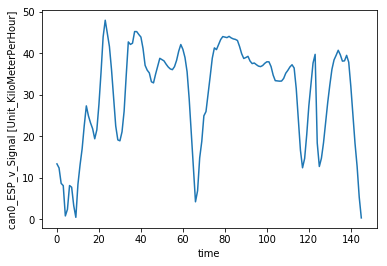

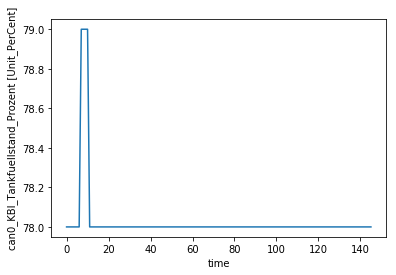

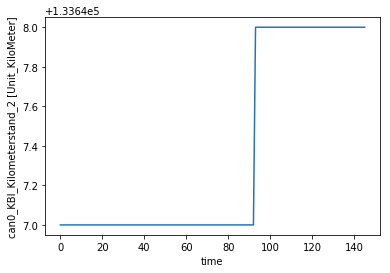

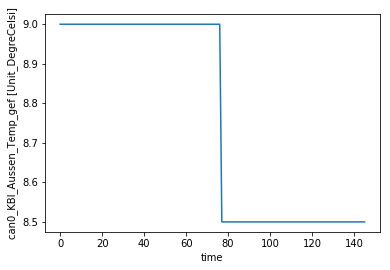

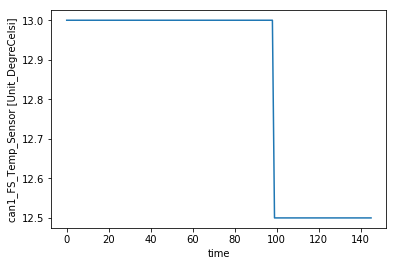

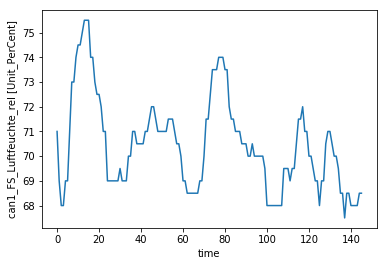

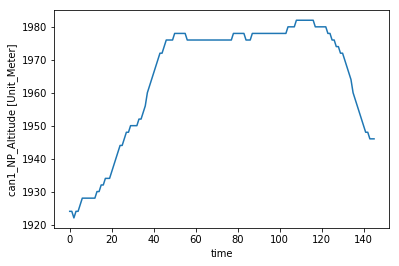

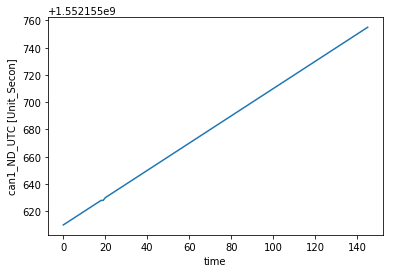

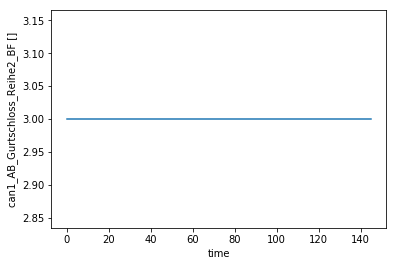

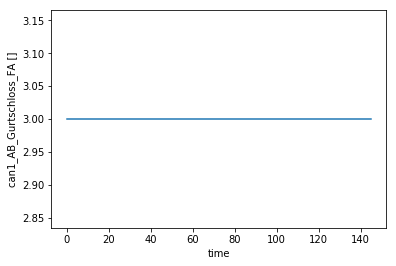

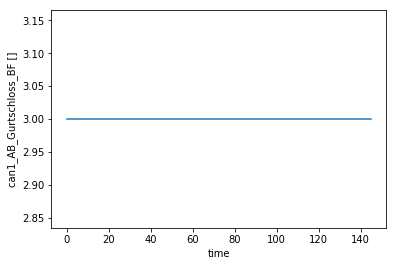

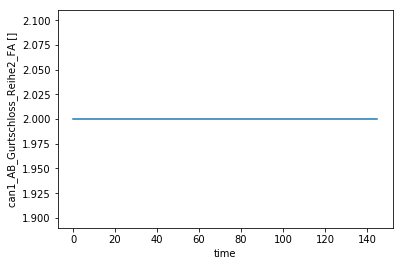

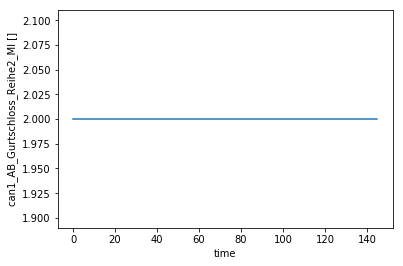

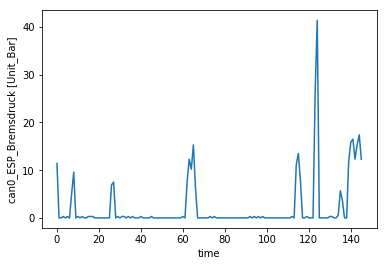

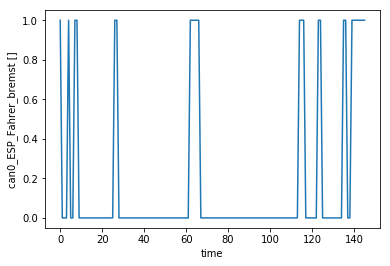

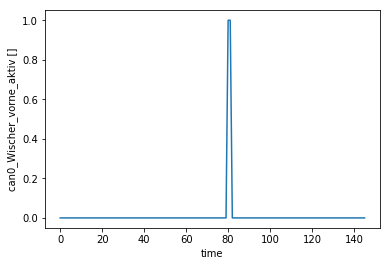

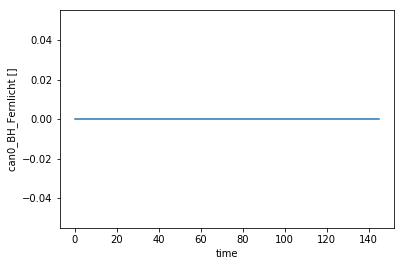

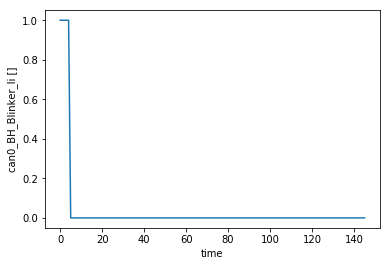

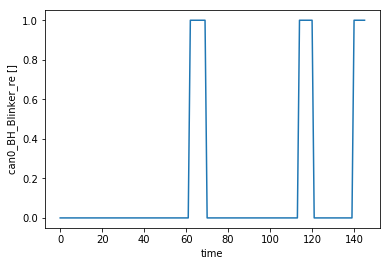

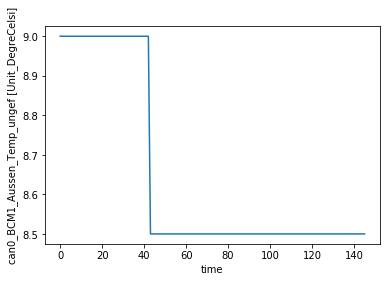

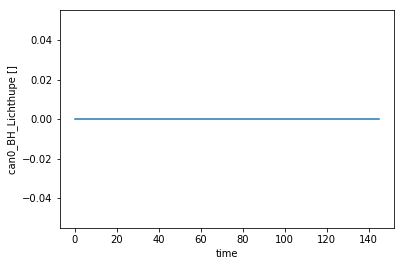

In [11]:
for c in golden_table.columns:
    sns.lineplot(x='time', y=c, data=golden_table.reset_index())
    plt.show()

In [12]:
# golden_table.columns = [x.replace(' ','').replace('[','').replace(']','') for x in golden_table.columns.tolist()]
# golden_table.columns.tolist()

In [40]:
golden_table.describe()

,TEMP_0,HR_0,ACC_0,ACC_1,ACC_2,EDA_0,BVP_0,can1_NP_LatDegree [Unit_DegreOfArc],can1_NP_LongDegree [Unit_DegreOfArc],can1_NP_Fix [],...,can1_AB_Gurtschloss_Reihe2_FA [],can1_AB_Gurtschloss_Reihe2_MI [],can0_ESP_Bremsdruck [Unit_Bar],can0_ESP_Fahrer_bremst [],can0_Wischer_vorne_aktiv [],can0_BH_Fernlicht [],can0_BH_Blinker_li [],can0_BH_Blinker_re [],can0_BCM1_Aussen_Temp_ungef [Unit_DegreCelsi],can0_BH_Lichthupe []
count,145.000000,137.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,...,146.0,146.0,146.000000,146.000000,146.000000,146.0,146.000000,146.000000,146.000000,146.0
mean,34.703517,121.392993,-23.219178,-28.458904,23.397260,0.213938,0.494932,47.434891,9.373666,3.0,...,2.0,2.0,2.130822,0.171233,0.013699,0.0,0.034247,0.143836,8.647260,0.0
std,2.568869,25.315362,22.111471,32.048912,30.948562,0.375063,103.879958,0.002077,0.001329,0.0,...,0.0,0.0,5.627807,0.378009,0.116637,0.0,0.182488,0.352131,0.228698,0.0
min,4.000000,1.000000,-128.000000,-86.000000,-49.000000,0.002561,-367.970000,47.431729,9.371716,3.0,...,2.0,2.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.500000,0.0
25%,34.840000,102.770000,-36.000000,-52.000000,6.000000,0.108220,-37.410000,47.432870,9.372526,3.0,...,2.0,2.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.500000,0.0
50%,34.950000,125.930000,-28.000000,-41.000000,32.000000,0.156247,5.405000,47.435375,9.373580,3.0,...,2.0,2.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.500000,0.0
75%,34.990000,141.730000,-7.500000,-10.250000,46.000000,0.192748,38.242500,47.436545,9.374638,3.0,...,2.0,2.0,0.300000,0.000000,0.000000,0.0,0.000000,0.000000,9.000000,0.0
max,35.030000,152.490000,32.000000,53.000000,95.000000,4.000000,330.470000,47.437940,9.376117,3.0,...,2.0,2.0,41.400000,1.000000,1.000000,0.0,1.000000,1.000000,9.000000,0.0


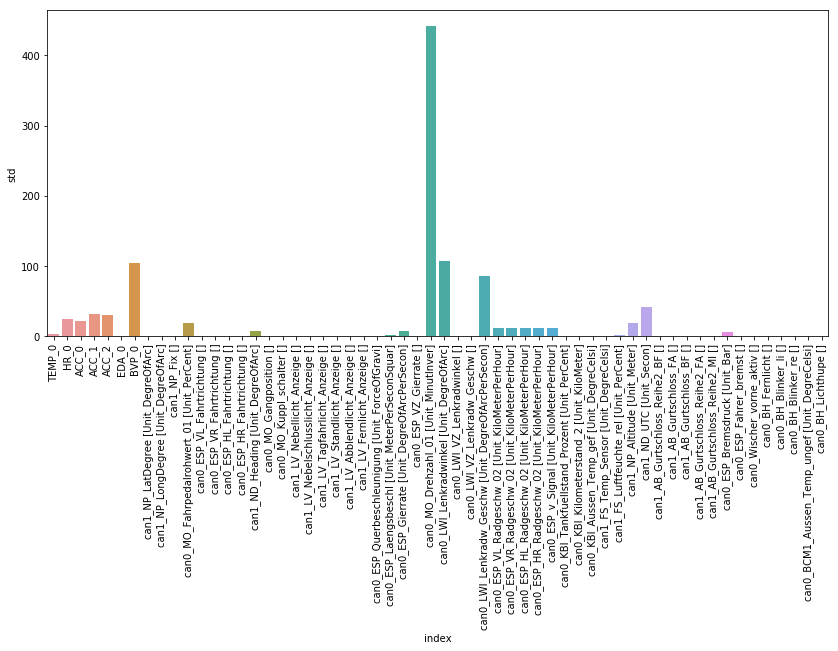

In [39]:
y = golden_table.describe().transpose()['std']
# print(y)
plt.figure(figsize=(14,6));
data = golden_table.describe().transpose().reset_index()
# print(data)
sns.barplot(x='index', y='std', data=data);
plt.xticks(rotation=90);

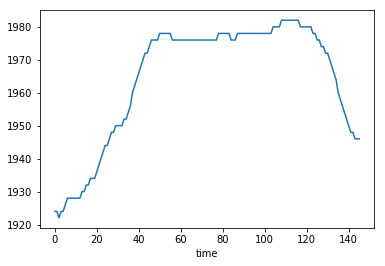

In [34]:
golden_table['can1_NP_Altitude [Unit_Meter]'].plot()
plt.show()

In [7]:
# write one additional row of the data table to csv
def stream_to_csv(df, csv_path, csv_name, update_interval=1):
    """ simulate stream that writes to csv file once per second
    
    we assume that the directories contain only the desired files.
    we round all time values to full second granularity and then drop duplicates on the time dimension
    we work with relative timestamps, starting at 0 seconds

    Parameters
    ----------
    df : DataFrame
        table with all data
    csv_path : string
        directory of out csv
    csv_name : string
        name of out csv
    update_interval : float
        waiting time in seconds until the next row is appended to the csv

    """
    # make sure the time is also written
    df = df.reset_index()
    n_rows = df.shape[0]
    counter = 0
    
    # remove old file, or create directory
    if os.path.isdir(csv_path):
        if os.path.isfile(os.path.join(csv_path, csv_name)):
            os.remove(os.path.join(csv_path, csv_name))
    else:
        os.makedirs(csv_path)
    
    # write header
    with open(os.path.join(csv_path, csv_name),'w') as f:
        writer = csv.writer(f)
#         print(df.columns.tolist())
        writer.writerow(df.columns.tolist())
    
    while counter < n_rows:
        with open(os.path.join(csv_path, csv_name),'a') as f:
            writer = csv.writer(f)
#             print(df.iloc[counter,:].values.tolist())
            writer.writerow(df.iloc[counter,:].values.tolist())
        time.sleep(update_interval)
        counter += 1
    print('stream ended')

In [8]:
stream_to_csv(golden_table, os.path.join(base_dir, 'tmp'), 'stream.csv')

stream ended
